<a href="https://colab.research.google.com/github/hwanggwu/CSCI6364_ML/blob/master/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from subprocess import check_output
from numpy.linalg import inv
from numpy import dot
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

In [141]:
## Import data
dataset = pd.read_csv("kc_house_data.csv")
year=dataset['yr_built']
price=dataset['price']
x1 = np.array(year).reshape(-1, 1)
y1 = np.array(price)
xtrain, xtest, ytrain, ytest = train_test_split(x1,y1,test_size=1/3, random_state=0)
lr = LinearRegression()
lr.fit(xtrain,ytrain)
f1 = lr.coef_[0]
print(f1)

668.9323430154792


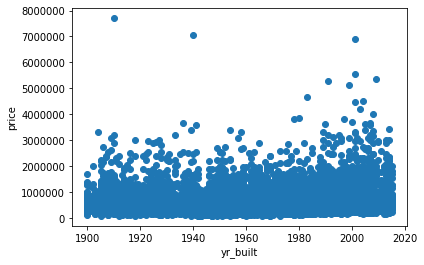

In [131]:
plt.scatter(dataset["yr_built"]
,dataset["price"]) 
plt.xlabel('yr_built')
plt.ylabel('price')
plt.show()


In [0]:
data = dataset[['yr_built','price']]#select 'yr_built', 'price'
data.insert(0, 'Ones', 1) 
# set X (training data) and y (target variable)
cols = data.shape[1] 
X = data.iloc[:,0:cols-1] 
y = data.iloc[:,cols-1:cols] 

In [133]:
X = np.matrix(X.values) 
y = np.matrix(y.values) # change to matrix
theta_n = dot(dot(inv(dot(X.T, X)), X.T),y) # theta = (X'X)^(-1)X'Y
print (theta_n)

## the function to compute cost
def computeCost(X, y, theta): 
    inner = np.power(((X * theta.T) - y), 2)
    return  np.sum(inner) / (2 * len(X))
X.shape, theta_n.shape, y.shape
lr_cost = computeCost(X, y, theta_n.T)
print(lr_cost)

[[-7.90477873e+05]
 [ 6.75069786e+02]]
67191483563.259796


In [0]:
# function of gradient Descent
def gradientDescent(X, y, theta, alpha, iters):  
    temp = np.matrix(np.zeros(theta.shape)) 
    parameters = int(theta.ravel().shape[1]) 
    cost = np.zeros(iters) 

    for i in range(iters):
        error = (X * theta.T) - y 

        for j in range(parameters):
            term = np.multiply(error, X[:,j]) 
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term)) 

        theta = temp
        cost[i] = computeCost(X, y, theta)

    return theta, cost

In [145]:
# Set up for gradient Descent
alpha = 0.001 
iters = 10000
theta = np.matrix(np.array([0,0]))
# perform gradient descent to "fit" the model
g, cost = gradientDescent(X, y, theta, alpha, iters) 
g 

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:38: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in power
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


matrix([[nan, nan]])

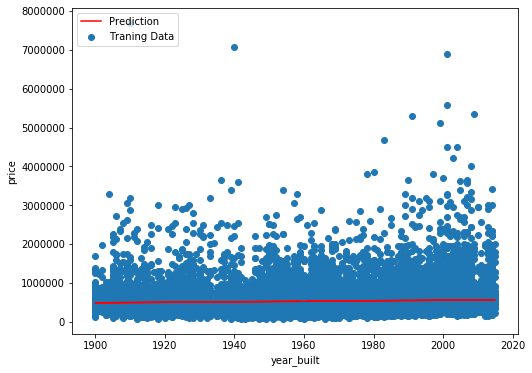

In [144]:
x = np.linspace(data.price.min(),
data.price.max(), 100000) 
f = beta[0] + (f1 * x) 
ax.plot(x, f, 'r', label='Prediction') 
fig, ax = plt.subplots(figsize=(8,6)) 
plt.plot(xtrain, lr.predict(xtrain), color = 'red',label='Prediction')
plt.scatter(data.yr_built, price,
label='Traning Data') 
ax.legend(loc=2) 
ax.set_xlabel('year_built') 
ax.set_ylabel('price') 
plt.show()